In [2]:
import pandas as pd
import seaborn as sns
from pylab import *
%matplotlib inline

# Binding site mutation from SomamiR

In [64]:
usecols = ["Mutationid", "Refseq", "Genesymbol", "miRNA",
           "Targetsiteclass", "Cancertype", "Targetscan", "wildtype_csp", "mutant_csp",
           "pita_ref", "pita_mut"]
df = pd.read_table("target_somatic.txt.gz", compression='gzip', usecols=usecols)

In [65]:
df.shape

(565953, 11)

In [66]:
df = df[df["Targetscan"] == 1]

In [67]:
df.shape

(113691, 11)

# 3'UTR length from UTRdb

In [7]:
FILE = "3UTRaspic.Hum.dat.tsv.gz"
t1 = pd.read_table(FILE, compression="gzip")

In [8]:
utrlen = t1.pivot_table(index="Gene", values="UTR_Size", aggfunc=max)

#by mutation events

In [9]:
#cancers = [i for i in set(df["Cancertype"].dropna()) if "TCGA" in i]  # cancer types of TCGA

In [10]:
pv = df.pivot_table(index="Cancertype", values="Mutationid", aggfunc=lambda x: len(x.unique()))  # number of mutation

In [11]:
cancers = pv[pv>=40].index
pv[pv>=40]

Cancertype
BladderUrothelialCarcinoma(TCGA,US)             147
Breast Cancer                                   339
BreastCarcinoma(WTSI,UK)                        120
ColonAdenocarcinoma(TCGA,US)                    444
Colorectal adenocarcinoma                       619
GastricCancer(CCGC,CN)                          184
Hepatocellular carcinoma                         58
Hypodiploid_ALL                                 151
Leukemia/T-ALL                                   60
LiverCancer(NCC,JP)                            4131
LiverCancer(RIKEN,JP)                          3450
Lung                                            294
Medulloblastoma                                 230
Melanoma                                        196
PediatricBrainTumors(DKFZ,DE)                    41
Prostate                                        146
ProstateCancer(OICR,CA)                        3243
RectumAdenocarcinoma(TCGA,US)                    74
Small cell lung cancer                           66
U

In [12]:
from scipy.stats import zscore
out = pd.DataFrame()
for i in cancers:
    df1 = df[df["Cancertype"] == i]
    print i, df1.shape
    pv1 = df1.pivot_table(index="Genesymbol", values="Mutationid", aggfunc=lambda x: len(x.unique()))
    df2 = pd.DataFrame({'freq': pv1, 'utr3len': utrlen}).dropna(subset=["utr3len"]).fillna(0)
    s1 = log2(1000. * df2['freq'] / df2['utr3len'] + 1)
    out[i] = s1
    #print s1.sort(ascending=False, inplace=False)[:10]

BladderUrothelialCarcinoma(TCGA,US) (714, 11)
Breast Cancer (2328, 11)
BreastCarcinoma(WTSI,UK) (800, 11)
ColonAdenocarcinoma(TCGA,US) (3420, 11)
Colorectal adenocarcinoma (3728, 11)
GastricCancer(CCGC,CN) (1238, 11)
Hepatocellular carcinoma (372, 11)
Hypodiploid_ALL (1124, 11)
Leukemia/T-ALL (685, 11)
LiverCancer(NCC,JP) (28048, 11)
LiverCancer(RIKEN,JP) (24157, 11)
Lung (2141, 11)
Medulloblastoma (1517, 11)
Melanoma (1330, 11)
PediatricBrainTumors(DKFZ,DE) (395, 11)
Prostate (934, 11)
ProstateCancer(OICR,CA) (29327, 11)
RectumAdenocarcinoma(TCGA,US) (647, 11)
Small cell lung cancer (541, 11)
UterineCorpusEndometrioidCarcinoma(TCGA,US) (7796, 11)
ccRCC (349, 11)


In [13]:
out2 = out[out.sum(axis=1) > 0]
out3 = out2.apply(zscore)
cutoff = out3.var(axis=1).sort(ascending=False, inplace=False)[40]
out4 = out3[out3.var(axis=1) > cutoff]
out4.describe()

,"BladderUrothelialCarcinoma(TCGA,US)",Breast Cancer,"BreastCarcinoma(WTSI,UK)","ColonAdenocarcinoma(TCGA,US)",Colorectal adenocarcinoma,"GastricCancer(CCGC,CN)",Hepatocellular carcinoma,Hypodiploid_ALL,Leukemia/T-ALL,"LiverCancer(NCC,JP)",...,Lung,Medulloblastoma,Melanoma,"PediatricBrainTumors(DKFZ,DE)",Prostate,"ProstateCancer(OICR,CA)","RectumAdenocarcinoma(TCGA,US)",Small cell lung cancer,"UterineCorpusEndometrioidCarcinoma(TCGA,US)",ccRCC
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,2.305209,0.986605,2.119440,1.477812,0.757168,0.249320,2.813793,1.235435,3.154243,0.501679,...,1.087363,1.119647,0.335819,2.142183,1.953930,0.379930,2.358069,3.943685,0.061899,0.853621
std,6.937164,5.259203,6.763807,6.395943,3.933604,1.847370,8.849839,6.006916,8.665829,2.163239,...,5.033956,5.164094,2.056102,8.278008,7.434340,2.283366,11.319600,9.955879,1.502496,5.796604
min,-0.100196,-0.168478,-0.098226,-0.120895,-0.234830,-0.119648,-0.068342,-0.108839,-0.056575,-0.642504,...,-0.156691,-0.134773,-0.121550,-0.062197,-0.109081,-0.423827,-0.032798,-0.071149,-0.260685,-0.062902
25%,-0.100196,-0.168478,-0.098226,-0.120895,-0.234830,-0.119648,-0.068342,-0.108839,-0.056575,-0.642504,...,-0.156691,-0.134773,-0.121550,-0.062197,-0.109081,-0.423827,-0.032798,-0.071149,-0.260685,-0.062902
50%,-0.100196,-0.168478,-0.098226,-0.120895,-0.234830,-0.119648,-0.068342,-0.108839,-0.056575,-0.642504,...,-0.156691,-0.134773,-0.121550,-0.062197,-0.109081,-0.423827,-0.032798,-0.071149,-0.260685,-0.062902
75%,-0.100196,-0.168478,-0.098226,-0.120895,-0.234830,-0.119648,-0.068342,-0.108839,-0.056575,0.998711,...,-0.156691,-0.134773,-0.121550,-0.062197,-0.109081,-0.423827,-0.032798,-0.071149,-0.260685,-0.062902
max,26.519544,28.621063,25.217112,33.977757,21.842539,11.108995,34.632086,30.891494,29.815277,10.026557,...,22.929736,25.062634,10.742350,41.957193,33.321570,9.674398,65.851828,39.563221,8.307149,36.598042


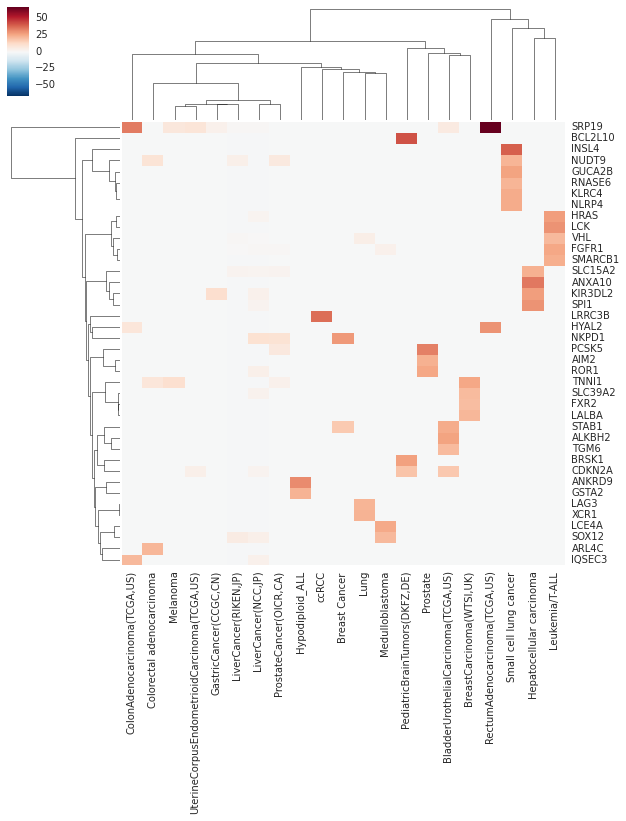

In [14]:
sns.clustermap(out4)

# by rewiring events

In [68]:
pv2 = df.pivot_table(index="Cancertype", values="Mutationid", aggfunc=len)  # number of rewiring events

In [74]:
cancers = pv2[pv2>500].index
pv2[pv2>500].index

Index([u'BladderUrothelialCarcinoma(TCGA,US)', u'Breast Cancer',
       u'BreastCarcinoma(WTSI,UK)', u'ColonAdenocarcinoma(TCGA,US)',
       u'Colorectal adenocarcinoma', u'GastricCancer(CCGC,CN)',
       u'Hypodiploid_ALL', u'Leukemia/T-ALL', u'LiverCancer(NCC,JP)',
       u'LiverCancer(RIKEN,JP)', u'Lung', u'Medulloblastoma', u'Melanoma',
       u'Prostate', u'ProstateCancer(OICR,CA)',
       u'RectumAdenocarcinoma(TCGA,US)', u'Small cell lung cancer',
       u'UterineCorpusEndometrioidCarcinoma(TCGA,US)'],
      dtype='object', name=u'Cancertype')

In [75]:
from scipy.stats import zscore
out = pd.DataFrame()
for i in cancers:
    df1 = df[df["Cancertype"] == i]
    print i, df1.shape
    pv1 = df1.pivot_table(index="Genesymbol", values="Mutationid", aggfunc=len)
    df2 = pd.DataFrame({'freq': pv1, 'utr3len': utrlen}).dropna(subset=["utr3len"]).fillna(0)
    s1 = log2(1000. * df2['freq'] / df2['utr3len'] + 1)
    #s1 = df2['freq']
    out[i] = s1
    #print s1.sort(ascending=False, inplace=False)[:10]

BladderUrothelialCarcinoma(TCGA,US) (714, 11)
Breast Cancer (2328, 11)
BreastCarcinoma(WTSI,UK) (800, 11)
ColonAdenocarcinoma(TCGA,US) (3420, 11)
Colorectal adenocarcinoma (3728, 11)
GastricCancer(CCGC,CN) (1238, 11)
Hypodiploid_ALL (1124, 11)
Leukemia/T-ALL (685, 11)
LiverCancer(NCC,JP) (28048, 11)
LiverCancer(RIKEN,JP) (24157, 11)
Lung (2141, 11)
Medulloblastoma (1517, 11)
Melanoma (1330, 11)
Prostate (934, 11)
ProstateCancer(OICR,CA) (29327, 11)
RectumAdenocarcinoma(TCGA,US) (647, 11)
Small cell lung cancer (541, 11)
UterineCorpusEndometrioidCarcinoma(TCGA,US) (7796, 11)


In [76]:
out.describe()

,"BladderUrothelialCarcinoma(TCGA,US)",Breast Cancer,"BreastCarcinoma(WTSI,UK)","ColonAdenocarcinoma(TCGA,US)",Colorectal adenocarcinoma,"GastricCancer(CCGC,CN)",Hypodiploid_ALL,Leukemia/T-ALL,"LiverCancer(NCC,JP)","LiverCancer(RIKEN,JP)",Lung,Medulloblastoma,Melanoma,Prostate,"ProstateCancer(OICR,CA)","RectumAdenocarcinoma(TCGA,US)",Small cell lung cancer,"UterineCorpusEndometrioidCarcinoma(TCGA,US)"
count,16913.000000,16913.000000,16913.000000,16913.000000,16913.000000,16913.000000,16913.000000,16913.000000,16913.000000,16913.000000,16913.000000,16913.000000,16913.000000,16913.000000,16913.000000,16913.000000,16913.000000,16913.000000
mean,0.010930,0.030648,0.010879,0.020863,0.051849,0.021873,0.013451,0.004716,0.376713,0.274758,0.022831,0.019637,0.019771,0.012968,0.226301,0.002483,0.007017,0.085786
std,0.166058,0.279631,0.174248,0.256741,0.354373,0.272413,0.191103,0.129334,0.993939,0.812723,0.229360,0.226568,0.238675,0.180196,0.842774,0.105232,0.146875,0.514881
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.631774,6.099454,5.733878,10.064706,5.782777,6.910711,6.626820,6.994997,8.300516,7.610615,5.997588,5.949308,6.598282,5.837433,9.541457,8.341495,5.821597,8.572688


In [77]:
out2 = out[out.sum(axis=1) > 0]
out3 = out2.apply(zscore)
#out3 = out2
cutoff = out3.var(axis=1).sort(ascending=False, inplace=False)[40]
out4 = out3[out3.var(axis=1) > cutoff]
out4.describe()

,"BladderUrothelialCarcinoma(TCGA,US)",Breast Cancer,"BreastCarcinoma(WTSI,UK)","ColonAdenocarcinoma(TCGA,US)",Colorectal adenocarcinoma,"GastricCancer(CCGC,CN)",Hypodiploid_ALL,Leukemia/T-ALL,"LiverCancer(NCC,JP)","LiverCancer(RIKEN,JP)",Lung,Medulloblastoma,Melanoma,Prostate,"ProstateCancer(OICR,CA)","RectumAdenocarcinoma(TCGA,US)",Small cell lung cancer,"UterineCorpusEndometrioidCarcinoma(TCGA,US)"
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1.717362,0.243913,2.239341,1.597017,0.631199,0.605037,1.771758,3.892220,-0.057823,-0.027555,0.245456,0.512549,0.620820,0.871561,0.187208,4.234714,4.298915,0.247563
std,5.147486,2.203317,6.284457,5.308378,2.248209,2.875925,5.785691,8.946671,1.203412,1.297889,2.578402,2.978596,3.118511,4.363926,1.647712,11.237479,8.347605,1.677239
min,-0.106781,-0.178925,-0.101247,-0.132072,-0.240724,-0.130480,-0.114243,-0.059014,-0.699046,-0.605162,-0.162225,-0.140971,-0.134663,-0.116829,-0.461779,-0.038157,-0.077375,-0.275589
25%,-0.106781,-0.178925,-0.101247,-0.132072,-0.240724,-0.130480,-0.114243,-0.059014,-0.699046,-0.605162,-0.162225,-0.140971,-0.134663,-0.116829,-0.461779,-0.038157,-0.077375,-0.275589
50%,-0.106781,-0.178925,-0.101247,-0.132072,-0.240724,-0.130480,-0.114243,-0.059014,-0.699046,-0.605162,-0.162225,-0.140971,-0.134663,-0.116829,-0.461779,-0.038157,-0.077375,-0.275589
75%,-0.106781,-0.178925,-0.101247,-0.132072,-0.240724,-0.130480,-0.114243,-0.059014,-0.424332,-0.605162,-0.162225,-0.140971,-0.134663,-0.116829,-0.461779,-0.038157,-0.077375,-0.275589
max,20.946973,13.447336,20.319561,24.248997,9.597739,15.645160,21.423578,33.434616,3.233246,3.811837,16.145020,16.202242,17.062756,20.007455,5.937578,49.019973,24.487680,7.017972


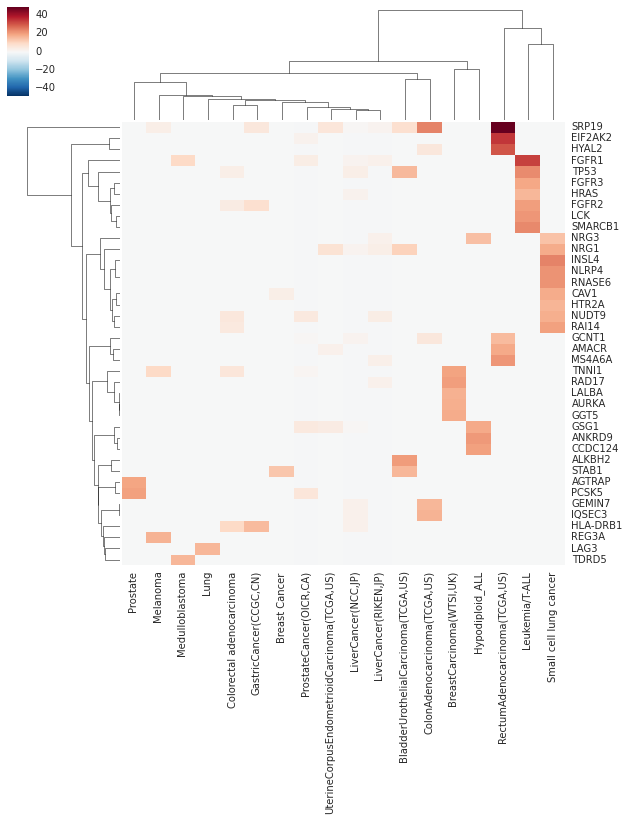

In [78]:
sns.clustermap(out4)

In [88]:
t1 = df[df["Cancertype"] == "Leukemia/T-ALL"]
t1.pivot_table(index="Targetsiteclass", aggfunc=len)

,Cancertype,Genesymbol,Mutationid,Refseq,Targetscan,miRNA,mutant_csp,pita_mut,pita_ref,wildtype_csp
Targetsiteclass,,,,,,,,,,
Created,340,340,340,340,340,340,340,340,340,340
Disrupted,345,345,345,345,345,345,345,345,345,345


In [89]:
t1[t1["Genesymbol"] == "FGFR1"].pivot_table(index="Targetsiteclass", aggfunc=len)

,Cancertype,Genesymbol,Mutationid,Refseq,Targetscan,miRNA,mutant_csp,pita_mut,pita_ref,wildtype_csp
Targetsiteclass,,,,,,,,,,
Created,135,135,135,135,135,135,135,135,135,135
Disrupted,180,180,180,180,180,180,180,180,180,180


In [103]:
t1[t1["Genesymbol"] == "FGFR2"].pivot_table(index="Targetsiteclass", aggfunc=len)

,Cancertype,Genesymbol,Mutationid,Refseq,Targetscan,miRNA,mutant_csp,pita_mut,pita_ref,wildtype_csp
Targetsiteclass,,,,,,,,,,
Created,42,42,42,42,42,42,42,42,42,42
Disrupted,14,14,14,14,14,14,14,14,14,14


In [104]:
t1[t1["Genesymbol"] == "FGFR3"].pivot_table(index="Targetsiteclass", aggfunc=len)

,Cancertype,Genesymbol,Mutationid,Refseq,Targetscan,miRNA,mutant_csp,pita_mut,pita_ref,wildtype_csp
Targetsiteclass,,,,,,,,,,
Created,9,9,9,9,9,9,9,9,9,9
Disrupted,15,15,15,15,15,15,15,15,15,15


In [93]:
t1[t1["Genesymbol"] == "HRAS"].pivot_table(index="Targetsiteclass", aggfunc=len)

,Cancertype,Genesymbol,Mutationid,Refseq,Targetscan,miRNA,mutant_csp,pita_mut,pita_ref,wildtype_csp
Targetsiteclass,,,,,,,,,,
Created,1,1,1,1,1,1,1,1,1,1
Disrupted,4,4,4,4,4,4,4,4,4,4


In [90]:
t1[t1["Genesymbol"] == "TP53"].pivot_table(index="Targetsiteclass", aggfunc=len)

,Cancertype,Genesymbol,Mutationid,Refseq,Targetscan,miRNA,mutant_csp,pita_mut,pita_ref,wildtype_csp
Targetsiteclass,,,,,,,,,,
Created,40,40,40,40,40,40,40,40,40,40
Disrupted,2,2,2,2,2,2,2,2,2,2


Above 40 vs 2 events actually came from 1 vs 1 mutation chr17:g.7572068G>A and chr17:g.7576533G>A.


In [94]:
t2 = df[df["Cancertype"] == "RectumAdenocarcinoma(TCGA,US)"]
t2.pivot_table(index="Targetsiteclass", aggfunc=len)

,Cancertype,Genesymbol,Mutationid,Refseq,Targetscan,miRNA,mutant_csp,pita_mut,pita_ref,wildtype_csp
Targetsiteclass,,,,,,,,,,
Created,343,343,343,343,343,343,343,343,343,343
Disrupted,304,304,304,304,304,304,304,304,304,304


In [96]:
t2[t2["Genesymbol"] == "SRP19"].pivot_table(index="Targetsiteclass", aggfunc=len)

,Cancertype,Genesymbol,Mutationid,Refseq,Targetscan,miRNA,mutant_csp,pita_mut,pita_ref,wildtype_csp
Targetsiteclass,,,,,,,,,,
Created,237,237,237,237,237,237,237,237,237,237
Disrupted,239,239,239,239,239,239,239,239,239,239


In [97]:
t2[t2["Genesymbol"] == "EIF2AK2"].pivot_table(index="Targetsiteclass", aggfunc=len)

,Cancertype,Genesymbol,Mutationid,Refseq,Targetscan,miRNA,mutant_csp,pita_mut,pita_ref,wildtype_csp
Targetsiteclass,,,,,,,,,,
Created,33,33,33,33,33,33,33,33,33,33
Disrupted,12,12,12,12,12,12,12,12,12,12


In [98]:
t2[t2["Genesymbol"] == "HYAL2"].pivot_table(index="Targetsiteclass", aggfunc=len)

,Cancertype,Genesymbol,Mutationid,Refseq,Targetscan,miRNA,mutant_csp,pita_mut,pita_ref,wildtype_csp
Targetsiteclass,,,,,,,,,,
Created,12,12,12,12,12,12,12,12,12,12
Disrupted,6,6,6,6,6,6,6,6,6,6


In [99]:
t3 = df[df["Cancertype"] == "Small cell lung cancer"]
t3.pivot_table(index="Targetsiteclass", aggfunc=len)

,Cancertype,Genesymbol,Mutationid,Refseq,Targetscan,miRNA,mutant_csp,pita_mut,pita_ref,wildtype_csp
Targetsiteclass,,,,,,,,,,
Created,243,243,243,243,243,243,243,243,243,243
Disrupted,298,298,298,298,298,298,298,298,298,298


In [100]:
t3[t3["Genesymbol"] == "NRG1"].pivot_table(index="Targetsiteclass", aggfunc=len)

,Cancertype,Genesymbol,Mutationid,Refseq,Targetscan,miRNA,mutant_csp,pita_mut,pita_ref,wildtype_csp
Targetsiteclass,,,,,,,,,,
Created,8,8,8,8,8,8,8,8,8,8
Disrupted,16,16,16,16,16,16,16,16,16,16


In [101]:
t3[t3["Genesymbol"] == "NRG3"].pivot_table(index="Targetsiteclass", aggfunc=len)

,Cancertype,Genesymbol,Mutationid,Refseq,Targetscan,miRNA,mutant_csp,pita_mut,pita_ref,wildtype_csp
Targetsiteclass,,,,,,,,,,
Created,12,12,12,12,12,12,12,12,12,12
Disrupted,3,3,3,3,3,3,3,3,3,3


In [102]:
t3[t3["Genesymbol"] == "INSL4"].pivot_table(index="Targetsiteclass", aggfunc=len)

,Cancertype,Genesymbol,Mutationid,Refseq,Targetscan,miRNA,mutant_csp,pita_mut,pita_ref,wildtype_csp
Targetsiteclass,,,,,,,,,,
Created,3,3,3,3,3,3,3,3,3,3
Disrupted,2,2,2,2,2,2,2,2,2,2
